# 1D model

## TODO 
* Then, start with a known signal in the real domain, take the DFT of that and then those are my point sources. This way we know what the actual signal is when we inverse Fourier transform the interpolated signal at the end (before dividing by sinc^2)

In [1]:
%load_ext autoreload
%autoreload 2
import site
import sys
import time
site.addsitedir('..')
from jax.config import config

config.update("jax_enable_x64", True)

In [3]:
import numpy as np
from  matplotlib import pyplot as plt

In [4]:
# Locations of point sources in Fourier, and their weights
# Although I should start with a known signal in the real domain, 
# Take the DFT and then those are my point sources in Fourier.

N = 7
t = np.fft.fftfreq(N, 1/N)
a = np.random.randn(N) 

t = np.fft.fftshift(t)
a = np.fft.fftshift(a)

In [5]:
def lin_interp(x, x0, x1, y0, y1):
    return (x-x0)*(y1-y0)/(x1-x0) + y0

In [6]:
tf = np.arange(-N/2, N/2, 0.1)
Ff = np.zeros(tf.shape)

eps = 1e-14
for i in range(N):

    
    i0 = np.mod(i, N)
    i1 = np.mod(i+1, N)
    x0 = t[i0]
    x1 = t[i1]
    y0 = a[i0]
    y1 = a[i1]
    
    for j in range(len(tf)):
        pt = tf[j]
        
        if i == N-1:
            x1 = t[i1] + N
            if pt < t[0]:
                pt = tf[j] + N
        
        if np.abs(pt - x0) < 1e-15:
            Ff[j] = y0
        elif np.abs(pt - x1) < 1e-15:
            Ff[j] = y1
        elif pt > x0 and pt < x1:
            Ff[j] = lin_interp(pt, x0, x1, y0, y1)  

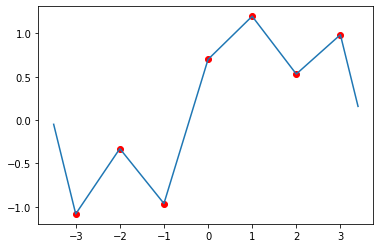

In [11]:
plt.plot(np.fft.fftshift(t), np.fft.fftshift(a), 'or')
plt.plot(tf, Ff)